In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic = titanic[['pclass', 'age', 'sex', 'survived']]
titanic.head()

,pclass,age,sex,survived
0,3,22.0,male,0
1,1,38.0,female,1
2,3,26.0,female,1
3,1,35.0,female,1
4,3,35.0,male,0


In [79]:
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
x = titanic.drop('survived', axis=1)
y = titanic['survived']
x.head()

,pclass,age,sex
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0


In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

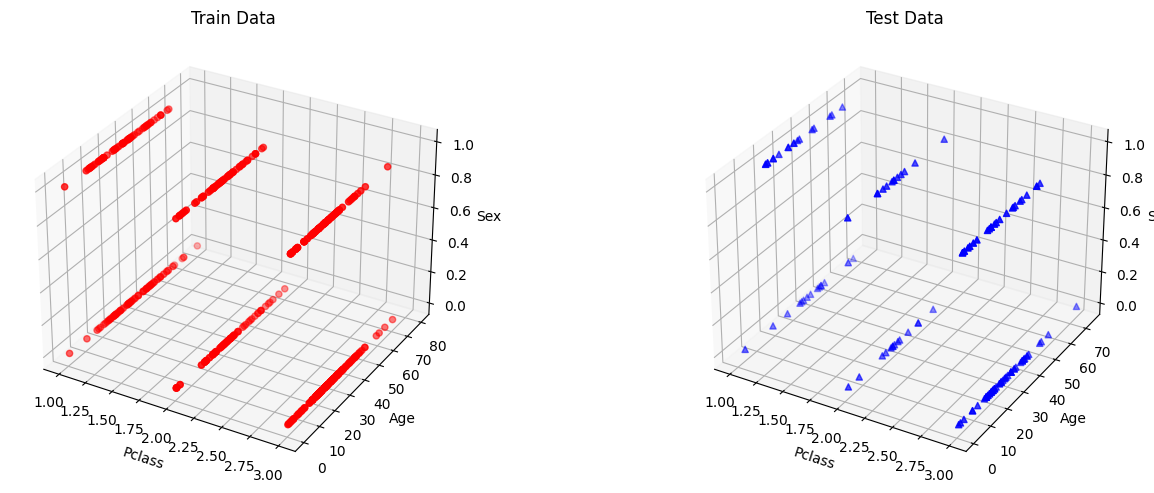

In [81]:
fig = plt.figure(figsize=(15, 5))

# Subplot for x_train
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_train['pclass'], x_train['age'], x_train['sex'], c='r', marker='o')
ax1.set_title('Train Data')
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Age')
ax1.set_zlabel('Sex')

# Subplot for x_test
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x_test['pclass'], x_test['age'], x_test['sex'], c='b', marker='^')
ax2.set_title('Test Data')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Age')
ax2.set_zlabel('Sex')

# Adjust layout to prevent overlap
plt.tight_layout()

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6993006993006993

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

In [101]:
cv = KFold(n_splits=5, shuffle=True, random_state=5)
cross_val_score(model, x, y, cv=cv)

array([0.71328671, 0.74125874, 0.71328671, 0.8041958 , 0.79577465])

In [109]:
cv = StratifiedKFold(5)
cross_val_score(model, x, y, cv=cv)

array([0.70629371, 0.76923077, 0.7972028 , 0.77622378, 0.8028169 ])

In [85]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring='accuracy')

array([0.70434783, 0.74561404, 0.70175439, 0.78070175, 0.73684211])

Best K is 11


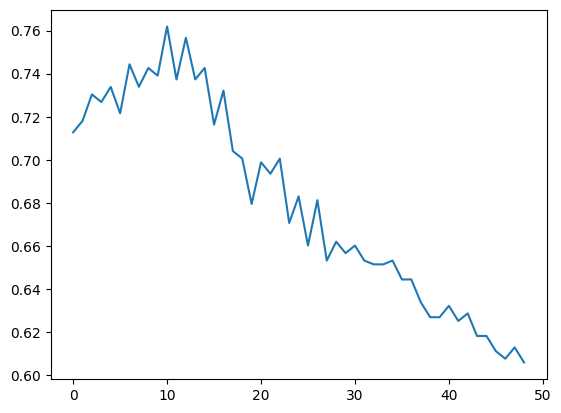

In [86]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)
print('Best K is', np.argmax(val_score) + 1)

In [87]:
from sklearn.model_selection import validation_curve

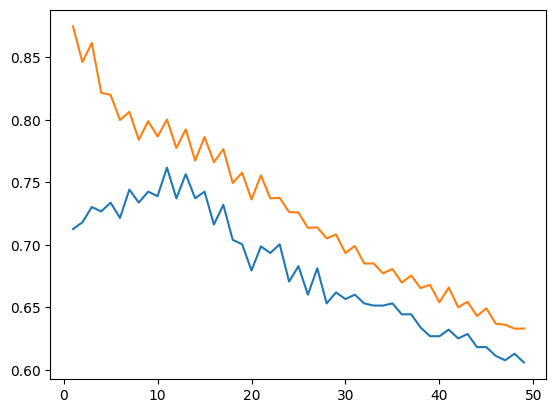

In [88]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, x_train, y_train, param_name='n_neighbors', param_range=k, cv=5)
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {'n_neighbors':np.arange(1,20),
                'metric':['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [91]:
grid.best_score_

0.7810983981693363

In [92]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [93]:
model = grid.best_estimator_

In [94]:
model.score(x_test, y_test)

0.7202797202797203

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
confusion_matrix(y_test, model.predict(x_test))

array([[72, 16],
       [24, 31]], dtype=int64)

In [97]:
from sklearn.model_selection import learning_curve

In [98]:
N, train_score, val_score = learning_curve(model, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1, 10))

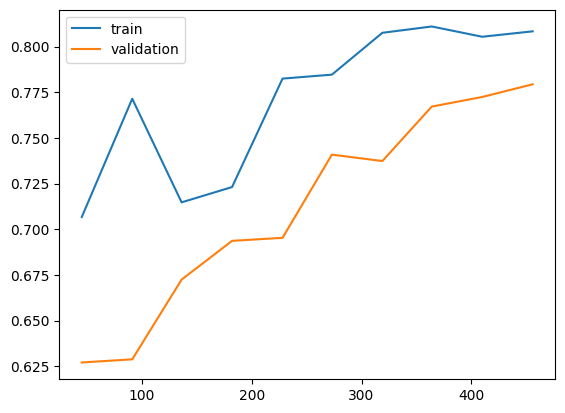

In [99]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.legend()